In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [5]:
df.shape

(300153, 12)

In [6]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


<Axes: >

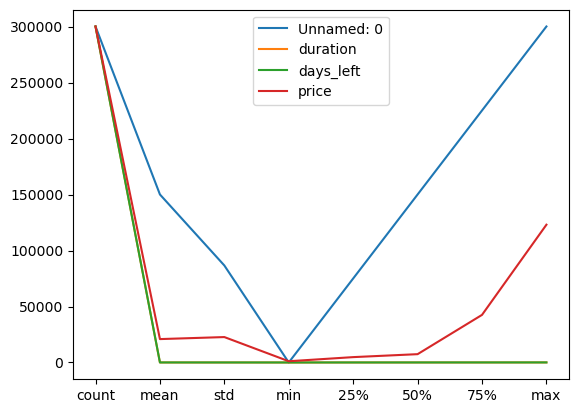

In [9]:
df.describe().plot()

In [10]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [11]:
df.airline.value_counts().sort_index()

airline
AirAsia       16098
Air_India     80892
GO_FIRST      23173
Indigo        43120
SpiceJet       9011
Vistara      127859
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


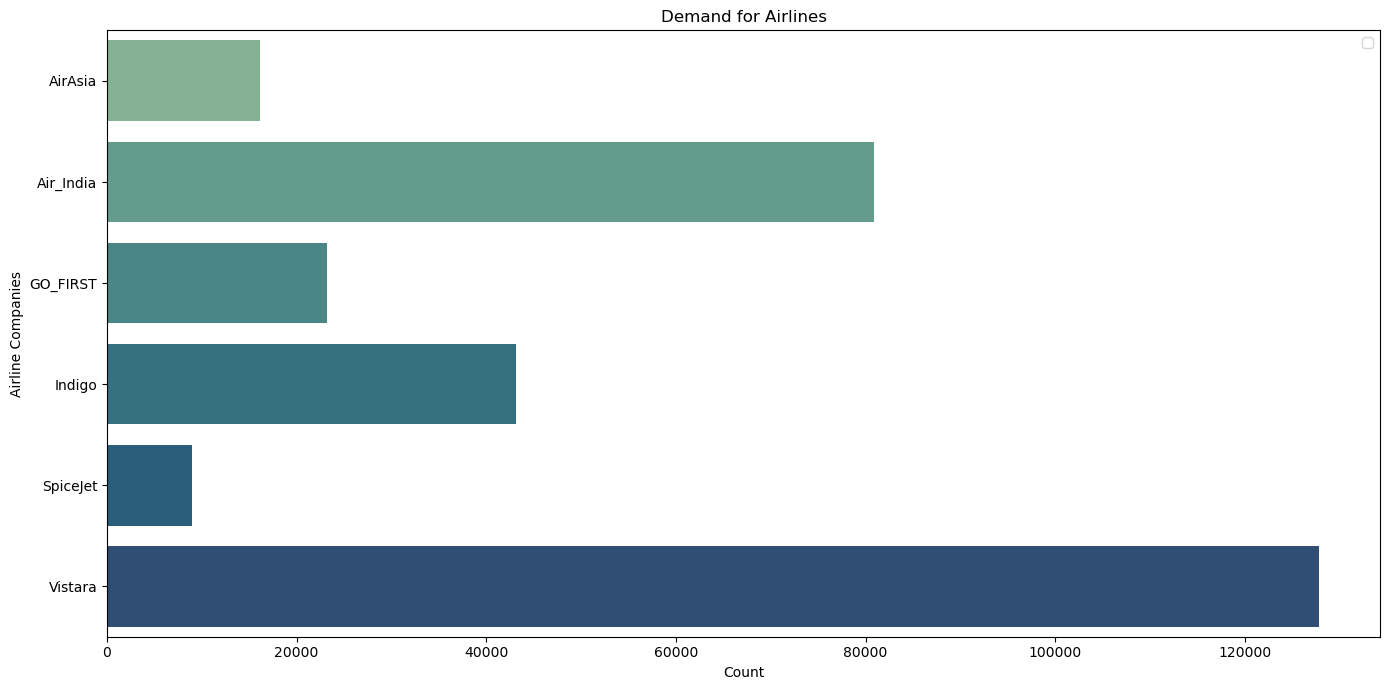

In [12]:
df_airline = df.airline.value_counts().sort_index()

plt.figure(figsize=(14,7))
sns.barplot(x =df_airline.values, y = df_airline.index, palette = 'crest')
plt.title('Demand for Airlines')
plt.xlabel('Count')
plt.ylabel('Airline Companies')
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

<Axes: ylabel='class'>

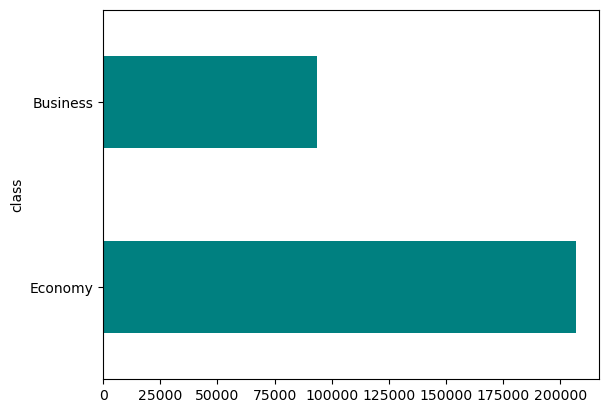

In [14]:
df['class'].value_counts().plot(kind='barh', color = 'teal')

In [15]:
class_and_airline = df[['class','airline']]

In [16]:
class_and_airline['ClasswithAirline'] = class_and_airline['class'] + '-' + class_and_airline['airline']

/var/folders/h6/2ktlcfzx68g5l0c4vghk_sr80000gn/T/ipykernel_10418/3075018914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_and_airline['ClasswithAirline'] = class_and_airline['class'] + '-' + class_and_airline['airline']


In [17]:
class_and_airline = class_and_airline.drop(['class','airline'], axis = 1)

In [18]:
class_and_airline = class_and_airline.value_counts()

In [19]:
class_and_airline

ClasswithAirline  
Economy-Vistara       67270
Business-Vistara      60589
Economy-Air_India     47994
Economy-Indigo        43120
Business-Air_India    32898
Economy-GO_FIRST      23173
Economy-AirAsia       16098
Economy-SpiceJet       9011
Name: count, dtype: int64

<Axes: ylabel='ClasswithAirline'>

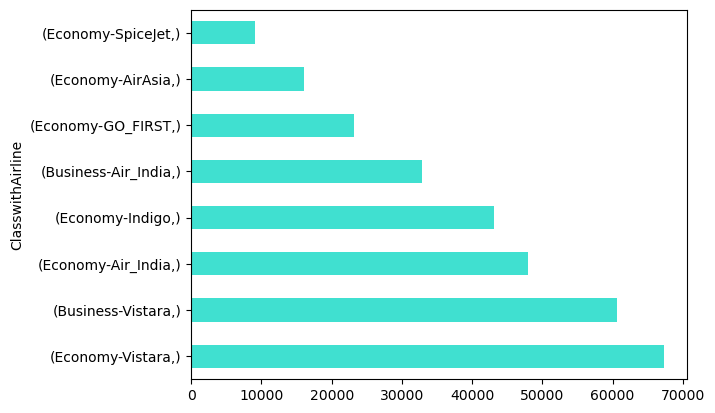

In [20]:
class_and_airline.plot(kind='barh', color = 'turquoise')

In [21]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [22]:
df_stops = df.stops.value_counts()

In [23]:
df_stops

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

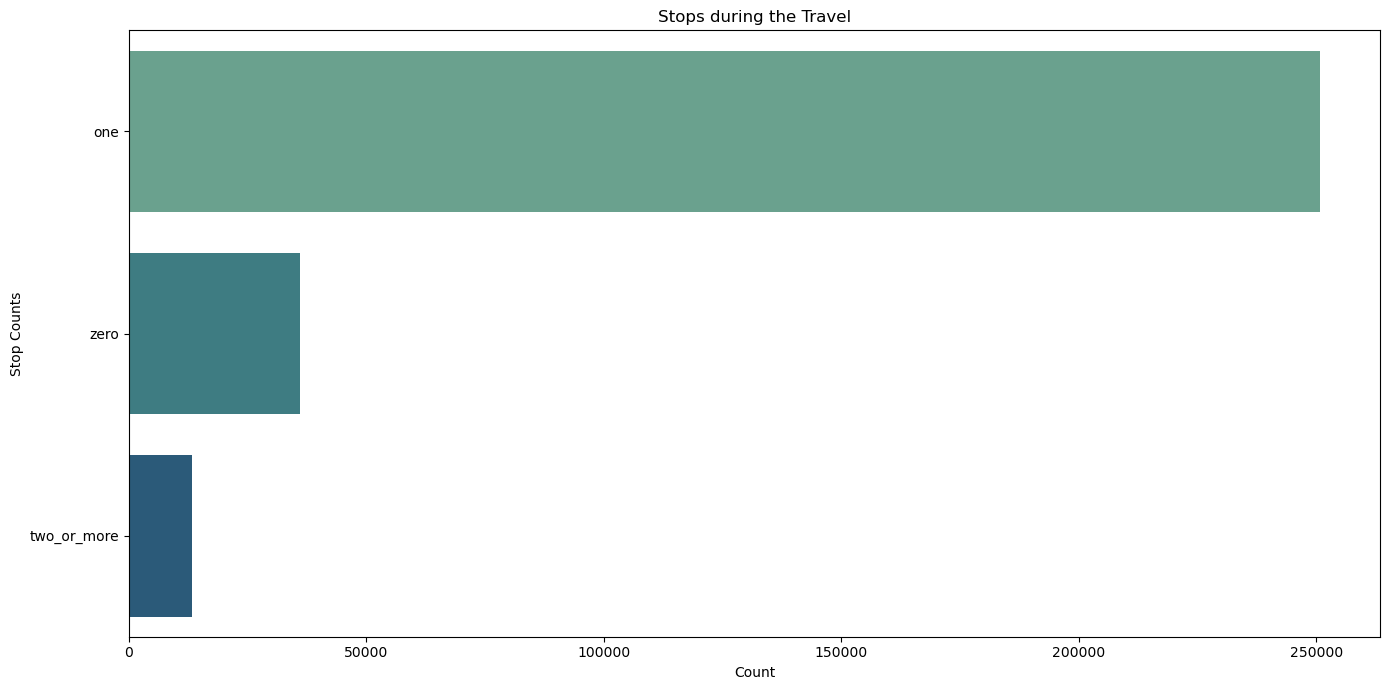

In [24]:
plt.figure(figsize=(14,7))
sns.barplot(x = df_stops.values, y = df_stops.index, palette ='crest')
plt.title('Stops during the Travel')
plt.xlabel('Count')
plt.ylabel('Stop Counts')
plt.tight_layout()
plt.show()

In [25]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [26]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [27]:
df = df.drop(['Unnamed: 0','flight'], axis = 1)

In [28]:
df['airline'] = df['airline'].map({'Vistara':1,'Air_India':2,'Indigo':3,'GO_FIRST':4,'AirAsia':5,'SpiceJet':6})
df['stops'] = df['stops'].map({'one':1,'zero':2,'two_or_more':3})
df['departure_time'] = df['departure_time'].map({'Early_Morning':1,'Morning':2,'Afternoon':3,'Evening':4,'Night':5,'Late_Night':6})
df['arrival_time'] = df['arrival_time'].map({'Early_Morning':1,'Morning':2,'Afternoon':3,'Evening':4,'Night':5,'Late_Night':6})
df['source_city'] = df['source_city'].map({'Delhi':1,'Mumbai':2,'Bangalore':3,'Kolkata':4,'Hyderabad':5,'Chennai':6})
df['destination_city'] = df['destination_city'].map({'Delhi':1,'Mumbai':2,'Bangalore':3,'Kolkata':4,'Hyderabad':5,'Chennai':6})
df['class'] = df['class'].map({'Economy':1,'Business':2})

In [29]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,6,1,4,2,5,2,1,2.17,1,5953
1,6,1,1,2,2,2,1,2.33,1,5953
2,5,1,1,2,1,2,1,2.17,1,5956
3,1,1,2,2,3,2,1,2.25,1,5955
4,1,1,2,2,2,2,1,2.33,1,5955


<Axes: >

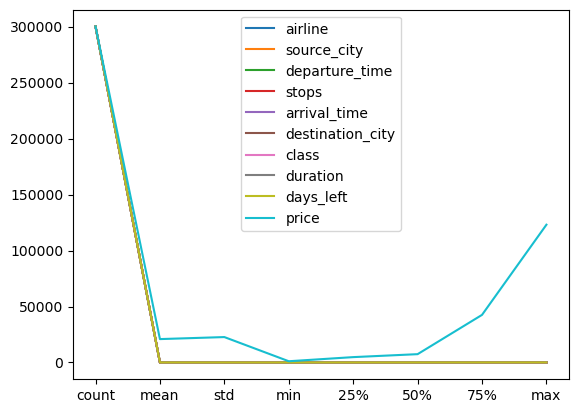

In [30]:
df.describe().plot()

In [31]:
correlation = df.corr()

In [32]:
correlation

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
airline,1.000000,-0.061739,-0.008695,0.091809,0.031609,-0.078039,-0.399635,-0.248911,0.019514,-0.428303
source_city,-0.061739,1.000000,-0.002556,-0.048660,0.045801,-0.201978,0.006292,0.063261,0.008704,0.026990
departure_time,-0.008695,-0.002556,1.000000,-0.031024,-0.079679,0.020780,0.030956,0.132773,-0.000222,0.020948
stops,0.091809,-0.048660,-0.031024,1.000000,-0.003418,0.026712,-0.131764,-0.256528,-0.016070,-0.173329
arrival_time,0.031609,0.045801,-0.079679,-0.003418,1.000000,-0.101751,-0.022473,-0.123949,-0.000700,-0.001019
destination_city,-0.078039,-0.201978,0.020780,0.026712,-0.101751,1.000000,0.015187,0.142453,-0.002465,0.034476
class,-0.399635,0.006292,0.030956,-0.131764,-0.022473,0.015187,1.000000,0.138710,-0.013039,0.937860
duration,-0.248911,0.063261,0.132773,-0.256528,-0.123949,0.142453,0.138710,1.000000,-0.039157,0.204222
days_left,0.019514,0.008704,-0.000222,-0.016070,-0.000700,-0.002465,-0.013039,-0.039157,1.000000,-0.091949
price,-0.428303,0.026990,0.020948,-0.173329,-0.001019,0.034476,0.937860,0.204222,-0.091949,1.000000


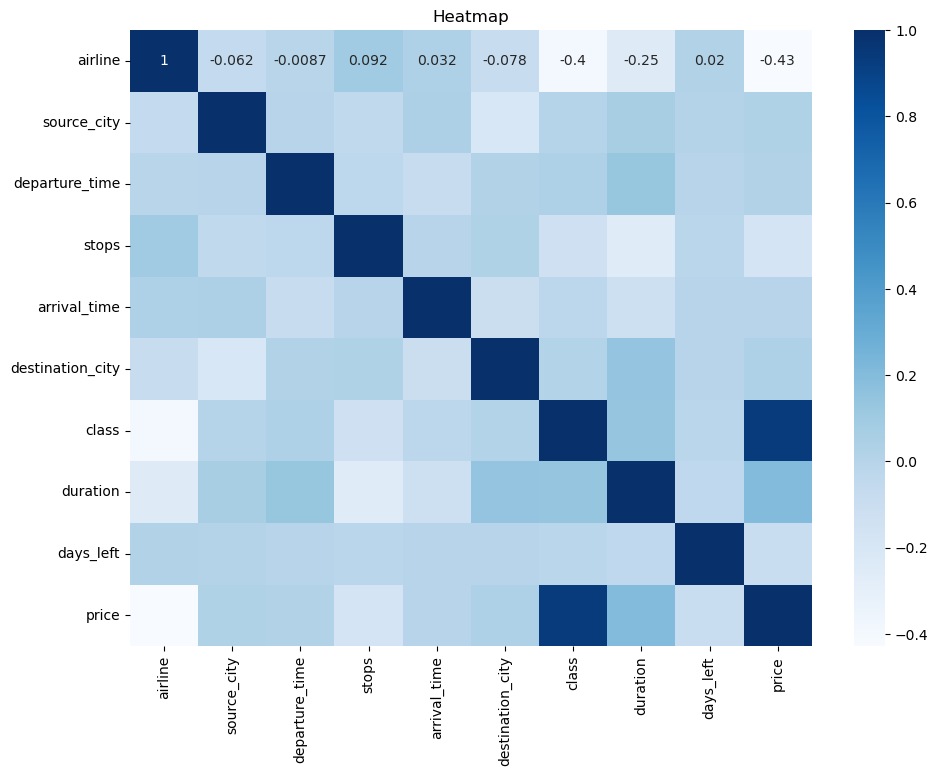

In [33]:
plt.figure(figsize=(11,8))
sns.heatmap(correlation, annot = True, cmap = 'Blues')
plt.title('Heatmap')
plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [35]:
X = df.drop('price', axis = 1)
y = df['price']

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)

In [37]:
print(X.shape,X_train.shape,X_test.shape)

(300153, 9) (255130, 9) (45023, 9)


In [38]:
model = RandomForestRegressor(n_jobs = -1)
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [39]:
model.score(X_test,y_test)

0.9850637024119427

In [40]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

In [41]:
y_pred = model.predict(X_test)

In [42]:
r2_score(y_test,y_pred)

0.9850637024119427

In [43]:
mean_absolute_error(y_test,y_pred)

1078.5950948924888

In [44]:
mean_squared_error(y_test,y_pred)

7668616.745472062

In [45]:
math.sqrt(mean_squared_error(y_test,y_pred))

2769.2267414338

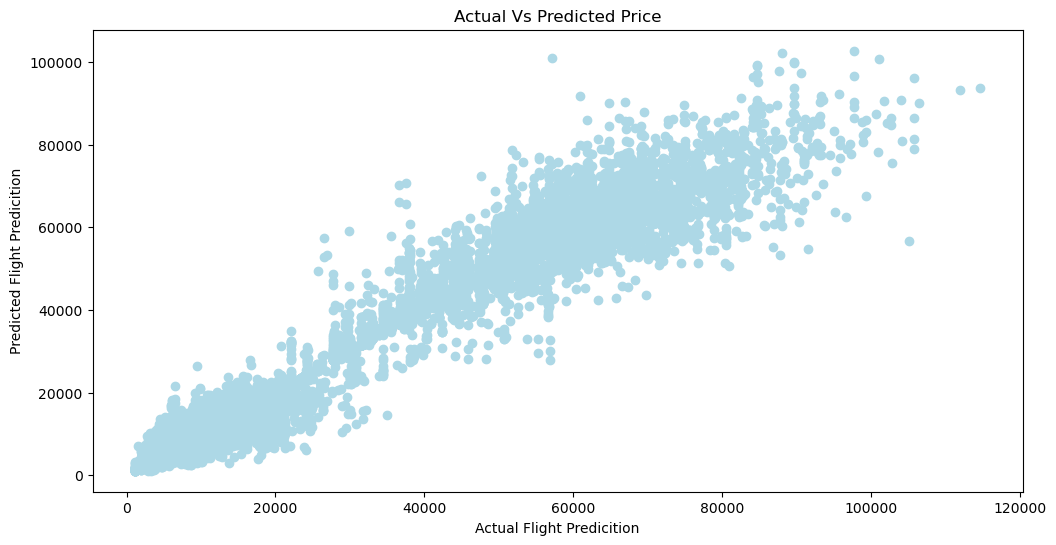

In [54]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,y_pred,color = 'lightblue')
plt.xlabel('Actual Flight Predicition')
plt.ylabel('Predicted Flight Predicition')
plt.title('Actual Vs Predicted Price')
plt.show()